# Augmentation example

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

from compose import Compose
from affine_transform.rotate import RandomRotate
from affine_transform.translate import RandomTranslate
from affine_transform.shear import RandomXShear, RandomYShear
from affine_transform.scale import RandomScale
from affine_transform.flip import RandomHorizontalFlip, RandomVerticalFlip
from visual_effect.histogram_equalize import CLAHE
from visual_effect.adjust_brightness import RandomAdjustBrightness
from visual_effect.adjust_hue import RandomAdjustHue
from visual_effect.adjust_saturation import RandomAdjustSaturation

In [2]:
def visualize(image, target):
    fig = plt.figure()
    ax = plt.axes()
    ax.imshow(image.transpose(1,2,0))
    bboxes = target['boxes']
    for bbox in bboxes:
        r = patches.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0], height=bbox[3] - bbox[1], color='lightgreen', fill=False)
        ax.add_patch(r)
    plt.show()

In [3]:
def sample_dataset(image_path, transform=None):
    origin_image = cv2.imread(image_path)[:,:,::-1]
    image = origin_image.transpose(2,0,1)
    target = {}
    target["boxes"] = np.array([[230, 220, 350, 390], [0, 0, 50, 50], [462, 462, 512, 512]], np.float32)
    target["labels"] = np.array([1, 0, 0], np.float32)
    target["image_id"] = np.array([1], np.float32)
    if transform is not None:
        image, target = transform(image, target)
    return image, target

In [4]:
image_path = './lena_color.tiff'
transforms = Compose(
    [RandomRotate(-10, 10),
     RandomTranslate((50, 50)),
     RandomXShear(-10, 10),
     RandomYShear(-10, 10),
     RandomScale(0.9, 1.1),
     RandomHorizontalFlip(0.5),
     RandomVerticalFlip(0.5),
     CLAHE(clip_limit=1.0),
     RandomAdjustBrightness(0.4, 1.0),
     RandomAdjustHue(-20, 20),
     RandomAdjustSaturation(0.95, 1.05)
    ])

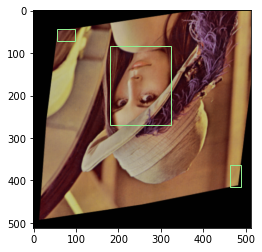

In [5]:
image, target = sample_dataset(image_path, transforms)
visualize(image, target)